# Modelos para la predicción de energía electrica

1. Cargo los datos tranformados en el notebook exploración de datos.
2. Exploro las variables a utilizar en los modelos.
3. Modelos:
    - 3.1. Modelo base de partida.
    - 3.2. Decision Tree.
    - 3.3. Random Forest.
    - 3.4. Gradient Boosting Trees.
4. Comparación de modelos.
5. Guardar el modelo elegido.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 6)

## 1 - Datos:

In [4]:
datos = pd.read_csv('datos_finales.csv', parse_dates = ['datetime'], index_col = 'datetime')
datos.index = pd.DatetimeIndex(datos.index).to_period('H')

In [5]:
datos

datetime_utc  demanda_electrica  tmed  \
datetime                                                               
2016-01-01 00:00  2016-01-01 00:00:00+01:00            487.174  12.4   
2016-01-01 01:00  2016-01-01 01:00:00+01:00            459.223  12.4   
2016-01-01 02:00  2016-01-01 02:00:00+01:00            428.181  12.4   
2016-01-01 03:00  2016-01-01 03:00:00+01:00            400.044  12.4   
2016-01-01 04:00  2016-01-01 04:00:00+01:00            379.334  12.4   
...                                     ...                ...   ...   
2019-12-31 19:00  2019-12-31 19:00:00+01:00            845.089  10.2   
2019-12-31 20:00  2019-12-31 20:00:00+01:00            801.779  10.2   
2019-12-31 21:00  2019-12-31 21:00:00+01:00            709.272  10.2   
2019-12-31 22:00  2019-12-31 22:00:00+01:00            625.302  10.2   
2019-12-31 23:00  2019-12-31 23:00:00+01:00            579.010  10.2   

                  minutos_luz  hora nombre_mes dia_semana  festivo  Monday  \
datetime                                                                     
2016-01-01 00:00          566     0    January     Friday        1       0   
2016-01-01 01:00          566     1    January     Friday        1       0   
2016-01-01 02:00          566     2    January     Friday        1       0   
2016-01-01 03:00          566     3    January     Friday        1       0   
2016-01-01 04:00          566     4    January     Friday        1       0   
...                       ...   ...        ...        ...      ...     ...   
2019-12-31 19:00          565    19   December    Tuesday        0       0   
2019-12-31 20:00          565    20   December    Tuesday        0       0   
2019-12-31 21:00          565    21   December    Tuesday        0       0   
2019-12-31 22:00          565    22   December    Tuesday        0       0   
2019-12-31 23:00          565    23   December    Tuesday        0       0   

                  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
datetime                                                                   
2016-01-01 00:00        0          0         0       1         0       0   
2016-01-01 01:00        0          0         0       1         0       0   
2016-01-01 02:00        0          0         0       1         0       0   
2016-01-01 03:00        0          0         0       1         0       0   
2016-01-01 04:00        0          0         0       1         0       0   
...                   ...        ...       ...     ...       ...     ...   
2019-12-31 19:00        1          0         0       0         0       0   
2019-12-31 20:00        1          0         0       0         0       0   
2019-12-31 21:00        1          0         0       0         0       0   
2019-12-31 22:00        1          0         0       0         0       0   
2019-12-31 23:00        1          0         0       0         0       0   

                  January  February  March  April  May  June  July  August  \
datetime                                                                     
2016-01-01 00:00        1         0      0      0    0     0     0       0   
2016-01-01 01:00        1         0      0      0    0     0     0       0   
2016-01-01 02:00        1         0      0      0    0     0     0       0   
2016-01-01 03:00        1         0      0      0    0     0     0       0   
2016-01-01 04:00        1         0      0      0    0     0     0       0   
...                   ...       ...    ...    ...  ...   ...   ...     ...   
2019-12-31 19:00        0         0      0      0    0     0     0       0   
2019-12-31 20:00        0         0      0      0    0     0     0       0   
2019-12-31 21:00        0         0      0      0    0     0     0       0   
2019-12-31 22:00        0         0      0      0    0     0     0       0   
2019-12-31 23:00        0         0      0      0    0     0     0       0   

                  September  October  November  December       fecha   año 

De éste dataframe, me voy a quedar con las variables que finalmente voy a utilizar:
- La variable objetivo, es decir, la variable que voy a tratar de predecir es 'demanda_electrica', que representa la energía eléctrica demandada en Islas Baleares en MW/h con frecuencia horaria.
- La features finalmente serán:
        - tmed: temperatura media diaria y que será común para todas las horas de un mismo día.
        - minutos_luz: minutos para cada día entre la salida y puesta de sol.
        - hora: hora del día.
        - festivo: variable que indica si el día es festivo (1) o no (0).
        - Cada uno de los días de la semana: Toma el valor 1 cuando se corresponde a ese día y 0 en caso contrario.

In [6]:
datos[['demanda_electrica', 'tmed', 'minutos_luz', 'festivo', 'hora',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

demanda_electrica  tmed  minutos_luz  festivo  hora  Monday  \
datetime                                                                        
2016-01-01 00:00            487.174  12.4          566        1     0       0   
2016-01-01 01:00            459.223  12.4          566        1     1       0   
2016-01-01 02:00            428.181  12.4          566        1     2       0   
2016-01-01 03:00            400.044  12.4          566        1     3       0   
2016-01-01 04:00            379.334  12.4          566        1     4       0   
...                             ...   ...          ...      ...   ...     ...   
2019-12-31 19:00            845.089  10.2          565        0    19       0   
2019-12-31 20:00            801.779  10.2          565        0    20       0   
2019-12-31 21:00            709.272  10.2          565        0    21       0   
2019-12-31 22:00            625.302  10.2          565        0    22       0   
2019-12-31 23:00            579.010  10.2          565        0    23       0   

                  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  
datetime                                                                  
2016-01-01 00:00        0          0         0       1         0       0  
2016-01-01 01:00        0          0         0       1         0       0  
2016-01-01 02:00        0          0         0       1         0       0  
2016-01-01 03:00        0          0         0       1         0       0  
2016-01-01 04:00        0          0         0       1         0       0  
...                   ...        ...       ...     ...       ...     ...  
2019-12-31 19:00        1          0         0       0         0       0  
2019-12-31 20:00        1          0         0       0         0       0  
2019-12-31 21:00        1          0         0       0         0       0  
2019-12-31 22:00        1          0         0       0         0       0  
2019-12-31 23:00        1          0         0       0         0       0  

[35064 rows x 12 columns]

## 2 - Exploración de las variables:
Graficos y correlaciones entre variables numéricas:

Creo un dataframe que contenga solo las variables numéricas:

In [7]:
datos_num = datos[['demanda_electrica', 'tmed', 'minutos_luz', 'hora']]
datos_num

demanda_electrica  tmed  minutos_luz  hora
datetime                                                    
2016-01-01 00:00            487.174  12.4          566     0
2016-01-01 01:00            459.223  12.4          566     1
2016-01-01 02:00            428.181  12.4          566     2
2016-01-01 03:00            400.044  12.4          566     3
2016-01-01 04:00            379.334  12.4          566     4
...                             ...   ...          ...   ...
2019-12-31 19:00            845.089  10.2          565    19
2019-12-31 20:00            801.779  10.2          565    20
2019-12-31 21:00            709.272  10.2          565    21
2019-12-31 22:00            625.302  10.2          565    22
2019-12-31 23:00            579.010  10.2          565    23

[35064 rows x 4 columns]

### Correlaciones:
A continuación, calculo la matriz de correlaciones entre las varibles numéricas y hago un heatmap con dicha matriz. De la matriz de correlaciones podemos deducir que todas las variables númericas tienen correlación positiva y de una magnitud parecida.

In [287]:
mat_corr = datos_num.corr()
mat_corr

demanda_electrica      tmed  minutos_luz      hora
demanda_electrica           1.000000  0.559286     0.427849  0.527520
tmed                        0.559286  1.000000     0.708039 -0.000064
minutos_luz                 0.427849  0.708039     1.000000  0.000151
hora                        0.527520 -0.000064     0.000151  1.000000

In [288]:
import seaborn as sns

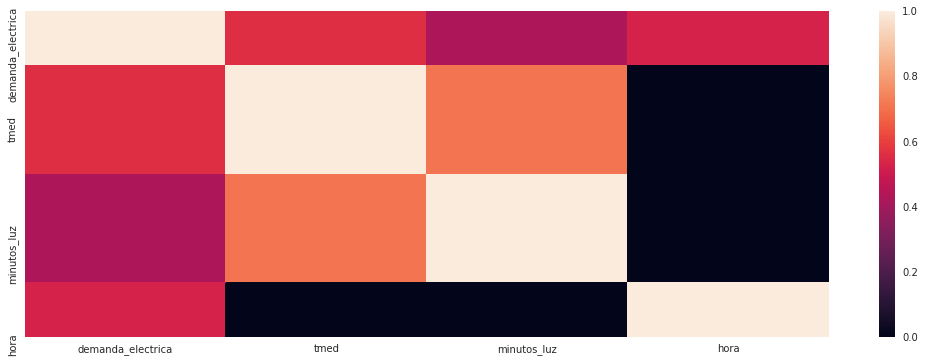

In [289]:
sns.heatmap(mat_corr);

### Gráficos:

- Energía eléctrica y Temperatura:

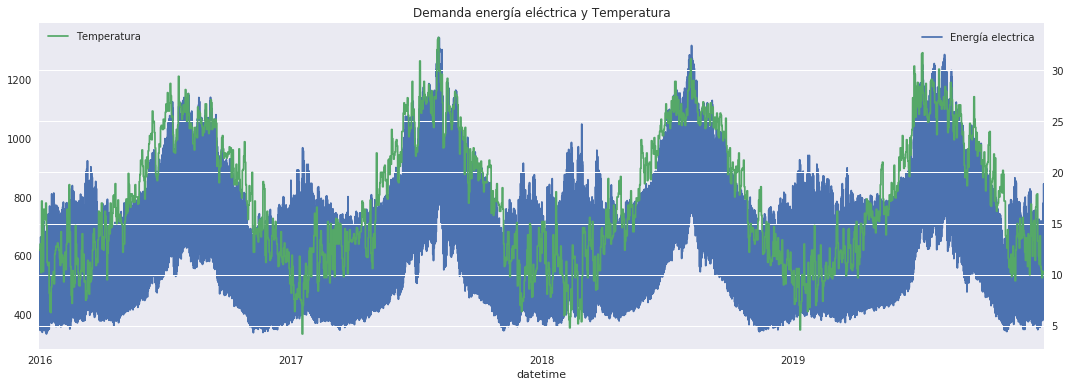

In [301]:
fig1, ax = plt.subplots()
datos['demanda_electrica'].plot(ax = ax)
plt.legend(['Energía electrica'], loc = 2)
datos['tmed'].plot(secondary_y = True)
plt.legend(['Temperatura'], loc = 2)
plt.title('Demanda energía eléctrica y Temperatura');

En éste gráfico se puede observar como existe cierta relación entre las temperaturas y la demanda de energía eléctrica. Se puede ver que cuando las temperaturas alcanzan los valores mas elevados, la demanda de energía también es alta.

- Energía eléctrica y minutos de luz:

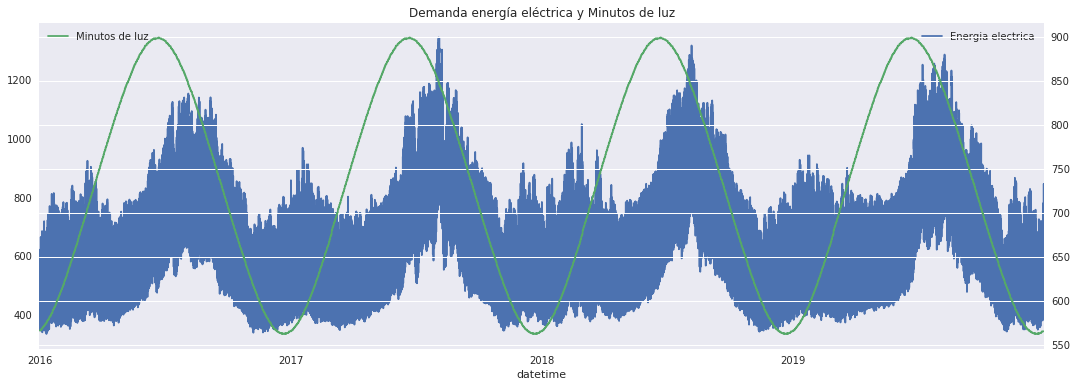

In [302]:
fig2, ax = plt.subplots()
datos['demanda_electrica'].plot(ax = ax)
plt.legend(['Energia electrica'], loc = 2)
datos['minutos_luz'].plot(ax = ax, secondary_y = True)
plt.legend(['Minutos de luz'], loc = 2)
plt.title('Demanda energía eléctrica y Minutos de luz');

En éste segundo gráfico vemos que también existe relación entre los minutos de luz diarios y la demanda de energía eléctrica. Sin embargo, se observa que el valor máximo de minutos de luz no se corresponde exactamente con los periodos del año donde parece que la demanda de energía electrica es mas elevada, pero si que se aprecia que ambas series tienen una estacionalidad paracida.

- Energía eléctrica y hora:

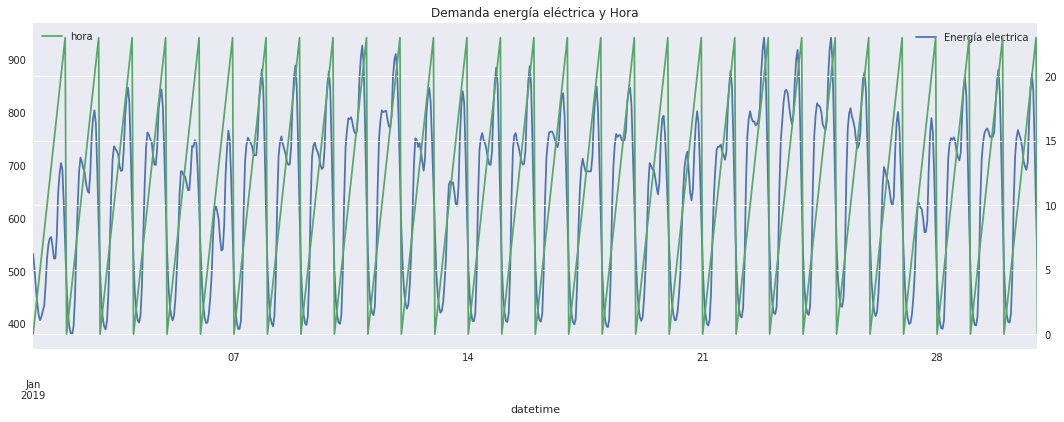

In [303]:
fig3, ax = plt.subplots()
datos['demanda_electrica'].truncate('2019-01-01', '2019-01-31').plot(ax = ax)
plt.legend(['Energía electrica'], loc = 2)
datos['hora'].truncate('2019-01-01', '2019-01-31').plot(ax = ax, secondary_y = True)
plt.legend(['hora'], loc = 2)
plt.title('Demanda energía eléctrica y Hora');

## 3 - Modelos:
A continuación se van a desarrollar los diferentes modelos que van a ser utilizados:  
En éste caso la predicción se hará con un horizonte temporal de una semana, y como la frecuencia de los datos es horaria, tenemos que se van a predecir 168 valores.  
Esto se traduce en que para entrenar los modelos utilizaremos todos los datos excepto la última semana, guardando los datos de esa última seman para test.

### 3.1 - Modelo Base:
Para tener un modelo de referencia con el que comparar el resto de modelos, creo un primer modelo en el que la predicción será los mismos valores que un año atrás:

In [14]:
datos_m_base = datos['demanda_electrica']
datos_m_base

datetime
2016-01-01 00:00    487.174
2016-01-01 01:00    459.223
2016-01-01 02:00    428.181
2016-01-01 03:00    400.044
2016-01-01 04:00    379.334
                     ...   
2019-12-31 19:00    845.089
2019-12-31 20:00    801.779
2019-12-31 21:00    709.272
2019-12-31 22:00    625.302
2019-12-31 23:00    579.010
Freq: H, Name: demanda_electrica, Length: 35064, dtype: float64

#### Predicción:  
Como mencionaba mas arriba, la predicción para éste modelo sera igual a los valores obtenidos un año atrás. Por lo tanto, la predicción de la ultima semana del año 2019 en éste modelo se corresponderá con los valores de los mismos días pero del año 2018

In [15]:
prediccion_m_base = datos_m_base[-8928:-8760]
prediccion_m_base.index = datos_m_base.index[-168:]
prediccion_m_base.head()

datetime
2019-12-25 00:00    500.598
2019-12-25 01:00    464.918
2019-12-25 02:00    427.017
2019-12-25 03:00    397.954
2019-12-25 04:00    382.630
Freq: H, Name: demanda_electrica, dtype: float64

#### Gráfico Valores Reales Vs Valores Predicción:

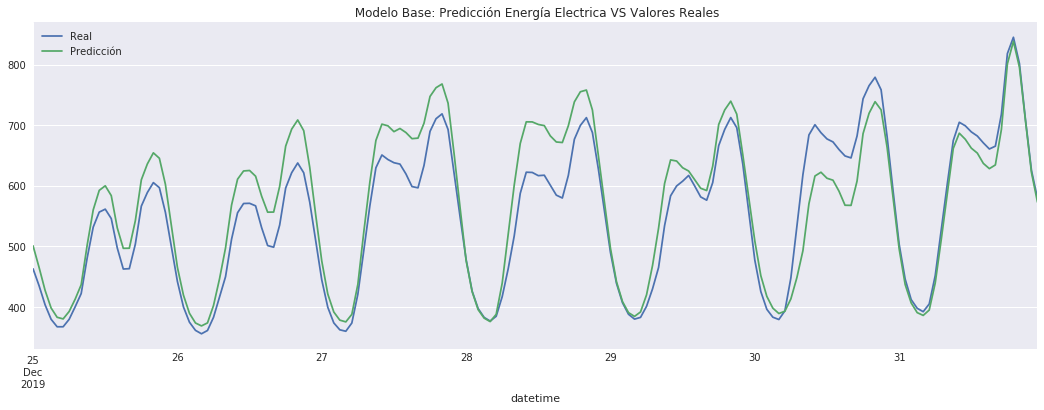

In [308]:
fig4, ax = plt.subplots()
datos_m_base[-168:].plot(ax = ax)
prediccion_m_base.plot(ax = ax)
plt.legend(['Real', 'Predicción'])
plt.title(' Modelo Base: Predicción Energía Electrica VS Valores Reales');

La representación gráfica entre los valores y las predicciones de éste modelo, muestra que si bien es cierto que para las horas de bajo consumo (durante la noche) parece que la predicción es buena, para las horas en las que el consumo es mas elevado o hay mas variaciones entre horas el error es mayor.

#### Métricas:
A continuación se van a presentar un conjunto de métricas que se van a emplear para poder comparar cada uno de los modelos planteados.  
Se va a calcular para cada uno de los modelos: $R^{2}$, RMSE, COrrelación y BIAS:

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
def correlacion(y_test, pred):
    return np.corrcoef(y_test,pred)[0][1]

In [19]:
def bias(y_test, pred):
    return np.mean(pred - y_test)

In [89]:
rmse_base = np.sqrt(mean_squared_error(datos_m_base[-168:], prediccion_m_base))
r2_base = r2_score(datos_m_base[-168:], prediccion_m_base)
corr_base = correlacion(datos_m_base[-168:], prediccion_m_base)
BIAS_base = bias(datos_m_base[-168:], prediccion_m_base)

In [90]:
metricas_m_base = pd.DataFrame({'Modelo': 'M. Base','rmse': [rmse_base], 'r2': [r2_base],
                                'corr': [corr_base], 'BIAS': [BIAS_base]})
metricas_m_base

Modelo       rmse        r2      corr       BIAS
0  M. Base  45.300074  0.856857  0.942085  18.827381

### 3.2 - Decision Tree:

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Divido los datos en variable objetivo (y) y features (x), y  a continuación hago las particiones para entrenamiento y para test.  
Éstos datos serán los utilizados tanto en éste modelo como en los dos siguientes:

In [23]:
y = datos['demanda_electrica']

x = datos[['tmed', 'minutos_luz', 'festivo', 'hora',
           'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [24]:
y_train = y[:-168]
y_test = y[-168:]

x_train = x[:-168]
x_test = x[-168:]

In [28]:
x_train.sample(5)

tmed  minutos_luz  festivo  hora  Monday  Tuesday  \
datetime                                                              
2016-02-09 18:00  13.0          628        0    18       0        1   
2018-10-12 14:00  20.1          677        1    14       0        0   
2018-05-11 06:00  16.6          854        0     6       0        0   
2017-12-20 11:00   9.5          562        0    11       0        0   
2019-02-21 00:00   9.7          657        0     0       0        0   

                  Wednesday  Thursday  Friday  Saturday  Sunday  
datetime                                                         
2016-02-09 18:00          0         0       0         0       0  
2018-10-12 14:00          0         0       1         0       0  
2018-05-11 06:00          0         0       1         0       0  
2017-12-20 11:00          1         0       0         0       0  
2019-02-21 00:00          0         1       0         0       0

In [26]:
y_train.head()

datetime
2016-01-01 00:00    487.174
2016-01-01 01:00    459.223
2016-01-01 02:00    428.181
2016-01-01 03:00    400.044
2016-01-01 04:00    379.334
Freq: H, Name: demanda_electrica, dtype: float64

In [107]:
def rmse(y_test, pred):
    return np.sqrt(mean_squared_error(y_test, pred))

#### Definición del modelo:

In [108]:
modelo_dtree = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,10),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring = make_scorer(rmse, greater_is_better = False))

#### Entrenamiento:

In [109]:
modelo_dtree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [110]:
modelo_dtree.best_params_

{'max_depth': 9, 'min_samples_leaf': 10}

In [309]:
modelo_dtree.best_score_

-54.19587540437446

#### Predicción:

In [112]:
prediccion_m_dtree = pd.DataFrame()
prediccion_m_dtree['prediccion'] = modelo_dtree.predict(x_test)
prediccion_m_dtree.index = y_test.index

#### Gráfico Valores Reales Vs Valores Predicción:

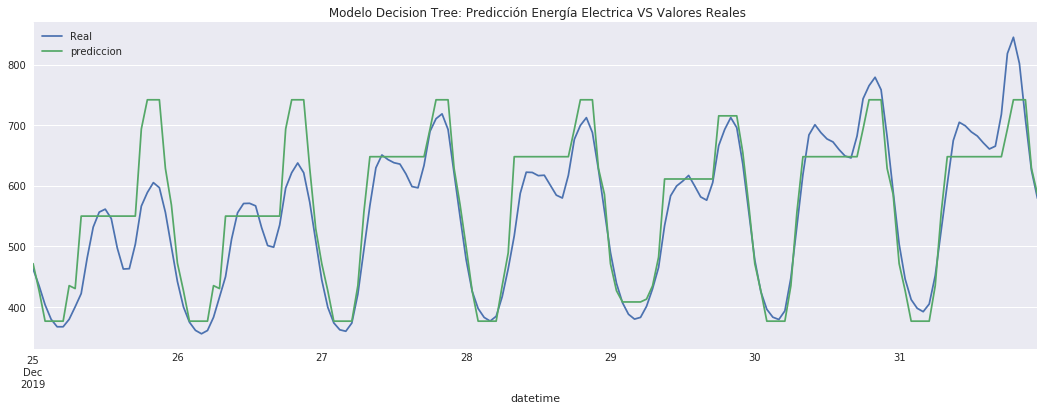

In [310]:
fig5, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_dtree.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Decision Tree: Predicción Energía Electrica VS Valores Reales');

Al igual que ocurria con las predicciones del modelo base, parece que el error es menor en las horas donde el consumo es bajo. Sin embargo, para el resto parece que las predicciones son peores que en el modelo base.

#### Métricas:

In [114]:
rmse_dtree = np.sqrt(mean_squared_error(y_test, prediccion_m_dtree['prediccion']))
r2_dtree = r2_score(y_test, prediccion_m_dtree['prediccion'])
corr_dtree = correlacion(y_test, prediccion_m_dtree['prediccion'])
BIAS_dtree = bias(y_test, prediccion_m_dtree['prediccion'])

In [115]:
metricas_m_dtree = pd.DataFrame({'Modelo': 'M. Decision Tree','rmse': [rmse_dtree], 'r2': [r2_dtree],
                                'corr': [corr_dtree], 'BIAS': [BIAS_dtree]})
metricas_m_dtree

Modelo       rmse        r2      corr       BIAS
0  M. Decision Tree  46.851951  0.846882  0.932964  16.362501

### 3.3 - Random Forest:

In [116]:
from sklearn.ensemble import RandomForestRegressor

#### Definición del modelo:

In [117]:
modelo_rforest = GridSearchCV(RandomForestRegressor(n_estimators = 50),
                  param_grid={"max_depth":np.arange(2,10),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring = make_scorer(rmse, greater_is_better = False))

#### Entrenamiento:

In [118]:
modelo_rforest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 

In [119]:
modelo_rforest.best_params_

{'max_depth': 9, 'min_samples_leaf': 10}

In [120]:
modelo_rforest.best_score_

-50.59444469443603

#### Predicción:

In [131]:
prediccion_m_rforest = pd.DataFrame()
prediccion_m_rforest['prediccion'] = modelo_rforest.predict(x_test)
prediccion_m_rforest.index = y_test.index

#### Gráfico Valores Reales Vs Valores Predicción:

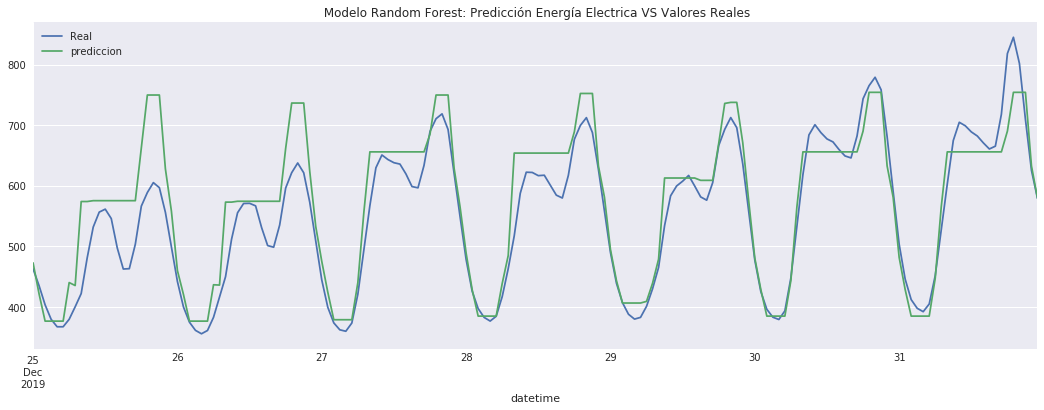

In [311]:
fig6, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_rforest.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Random Forest: Predicción Energía Electrica VS Valores Reales');

#### Métricas:

In [133]:
rmse_rforest = np.sqrt(mean_squared_error(y_test, prediccion_m_rforest['prediccion']))
r2_rforest = r2_score(y_test, prediccion_m_rforest['prediccion'])
corr_rforest = correlacion(y_test, prediccion_m_rforest['prediccion'])
BIAS_rforest = bias(y_test, prediccion_m_rforest['prediccion'])

In [134]:
metricas_m_rforest = pd.DataFrame({'Modelo': 'M. Random Forest','rmse': [rmse_rforest], 'r2': [r2_rforest],
                                'corr': [corr_rforest], 'BIAS': [BIAS_rforest]})
metricas_m_rforest

Modelo       rmse        r2      corr       BIAS
0  M. Random Forest  49.379774  0.829914  0.933538  22.712233

### 3.4 - Gradient Boosting:

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

#### Definición del modelo:

In [127]:
modelo_gradientB = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring = make_scorer(rmse, greater_is_better = False),
                  cv=5)

#### Entrenamiento:

In [128]:
modelo_gradientB.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50,
                                                 n_iter_...
                             

In [129]:
modelo_gradientB.best_params_

{'learning_rate': 0.1, 'max_depth': 8}

In [130]:
modelo_gradientB.best_score_

-41.64583298717404

#### Predicción:

In [135]:
prediccion_m_gradientB = pd.DataFrame()
prediccion_m_gradientB['prediccion'] = modelo_gradientB.predict(x_test)
prediccion_m_gradientB.index = y_test.index

#### Gráfico Valores Reales Vs Valores Predicción:

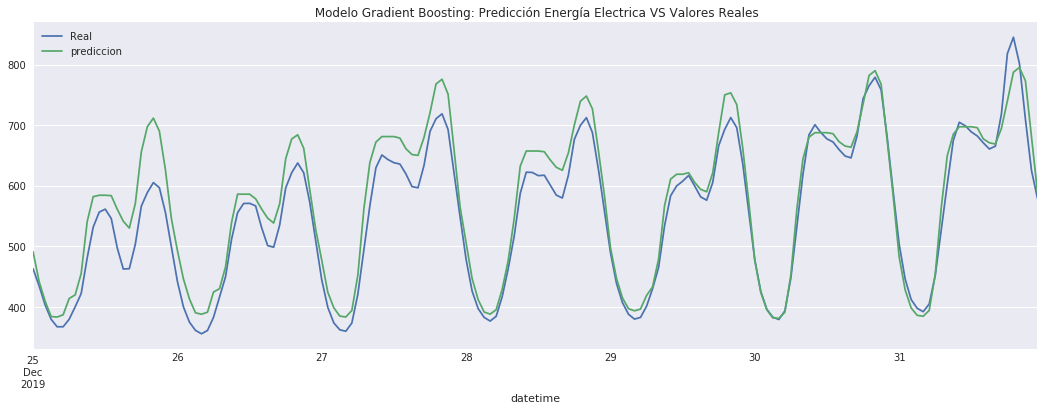

In [312]:
fig7, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_gradientB.plot(ax = ax, label = 'Prediccion')
plt.legend()
plt.title(' Modelo Gradient Boosting: Predicción Energía Electrica VS Valores Reales');

En éste caso si que se puede apreciar que la predicción es mejor, incluso superando al modelo base, cosa que los dos modelos anteriores no hacían.

#### Métricas:

In [140]:
rmse_gradientB = np.sqrt(mean_squared_error(y_test, prediccion_m_gradientB['prediccion']))
r2_gradientB = r2_score(y_test, prediccion_m_gradientB['prediccion'])
corr_gradientB = correlacion(y_test, prediccion_m_gradientB['prediccion'])
BIAS_gradientB = bias(y_test, prediccion_m_gradientB['prediccion'])

In [141]:
metricas_m_gradientB = pd.DataFrame({'Modelo': 'M. Gradient Boosting','rmse': [rmse_gradientB], 'r2': [r2_gradientB],
                                'corr': [corr_gradientB], 'BIAS': [BIAS_gradientB]})
metricas_m_gradientB

Modelo       rmse        r2      corr       BIAS
0  M. Gradient Boosting  35.845656  0.910372  0.977808  25.018992

## 4 - Comparación de modelos:
En ésta sección voya comparar los distintos modelos calculados. Lo voy a hacer a traves de la comparación de las gráficas de todos los modelos y comparando las métricas calculadas:

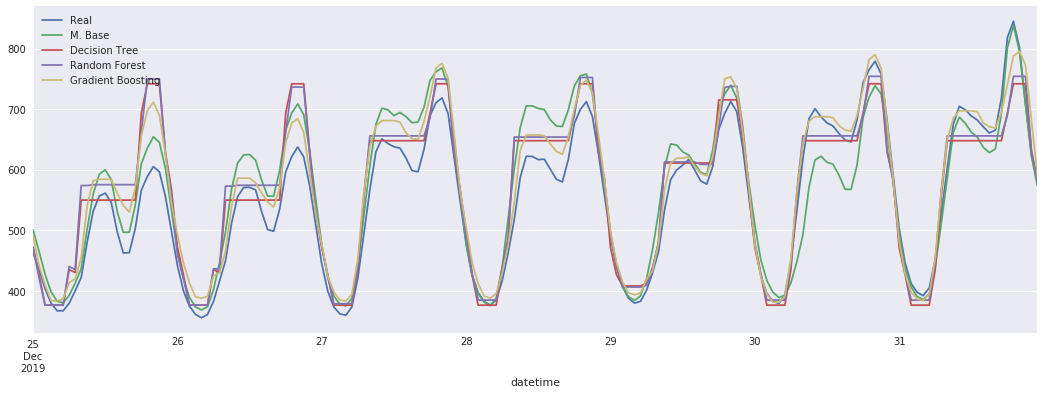

In [313]:
fig8, ax = plt.subplots()
y_test.plot(ax = ax)
prediccion_m_base.plot( ax = ax)
prediccion_m_dtree.plot( ax = ax)
prediccion_m_rforest.plot( ax = ax)
prediccion_m_gradientB.plot( ax = ax)
plt.legend(['Real', 'M. Base', 'Decision Tree', 'Random Forest', 'Gradient Boosting']);

A través de éste grafico, donde se pueden ver las predicciones de todos los modelos frente a los datos reales, nos podemos dar cuenta de que el mejor modelo es el Gradient Boosting. Pero para hacer un análisis mas preciso de como se comportan las predicciones para cada cada hora, el siguiente gráfico muestra lo mismo pero solo para uno de los dias de la semana para los que se ha realizado la priedicción:

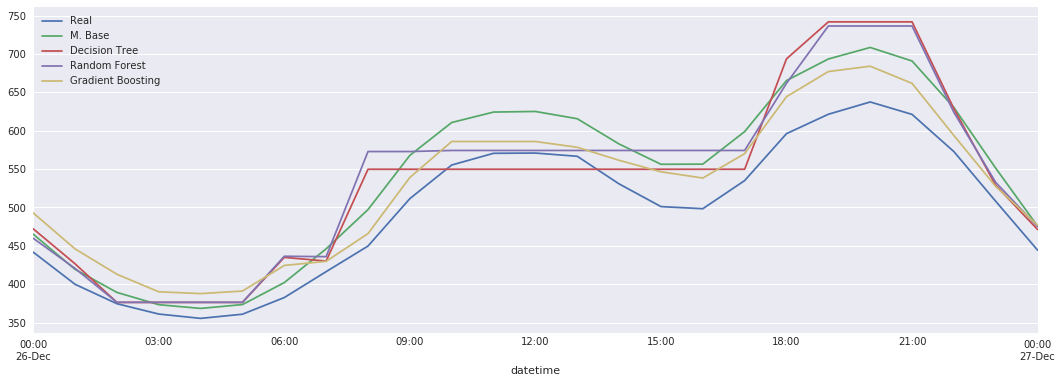

In [239]:
fig9, ax = plt.subplots()
y_test.truncate('2019-12-26', '2019-12-27').plot(ax = ax)
prediccion_m_base.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_dtree.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_rforest.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
prediccion_m_gradientB.truncate('2019-12-26', '2019-12-27').plot( ax = ax)
plt.legend(['Real', 'M. Base', 'Decision Tree', 'Random Forest', 'Gradient Boosting']);

En éste caso podemos confirmar lo comentado en el anterior gráfico; el mejor modelo es el gradient boosting seguido por el modelo base. Podemos observar que, como comentaba mas arriba, durante las horas de menor consumo (de madrugada) todos los modelos se comportan de forma muy parecida, sin embargo, para el resto de horas del día el modelo que mejor se ajusta a la realidad es el gradient boosting.

#### Comparación de métricas:
De la misma forma que se hn comparados los modelos de forma gráfica, se va a hacer comparando las métricas calcualadas para cada modelo. En éste caso, se confirma lo que se veía en los gráficos, es decir, que el modelo con mayor capacidad predictiva es el gradient boosting seguido por el modelo base. El gradient boosting es el que posee menor RMSE, mayor $R^{2}$, y mayor Correlación entre datos de test y predicción.

In [317]:
comparacion_metricas = pd.concat([metricas_m_base, metricas_m_dtree, metricas_m_rforest, metricas_m_gradientB],
                                 ignore_index = True)
comparacion_metricas.index = comparacion_metricas['Modelo']
comparacion_metricas.drop('Modelo', axis = 1, inplace = True)
comparacion_metricas

rmse        r2      corr       BIAS
Modelo                                                        
M. Base               45.300074  0.856857  0.942085  18.827381
M. Decision Tree      46.851951  0.846882  0.932964  16.362501
M. Random Forest      49.379774  0.829914  0.933538  22.712233
M. Gradient Boosting  35.845656  0.910372  0.977808  25.018992

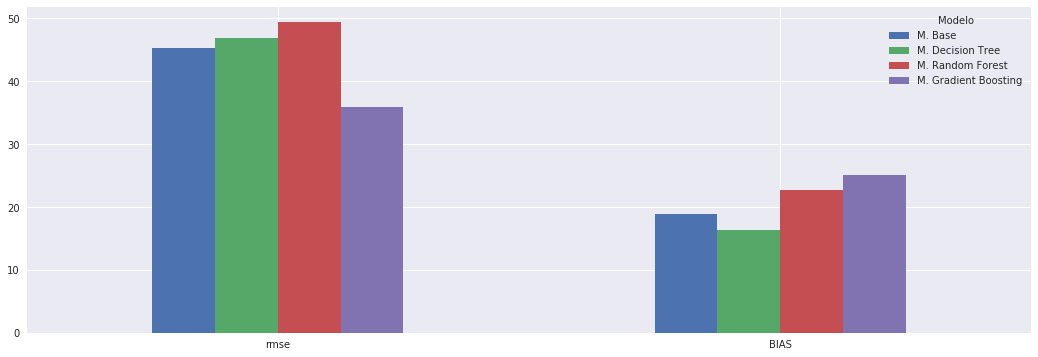

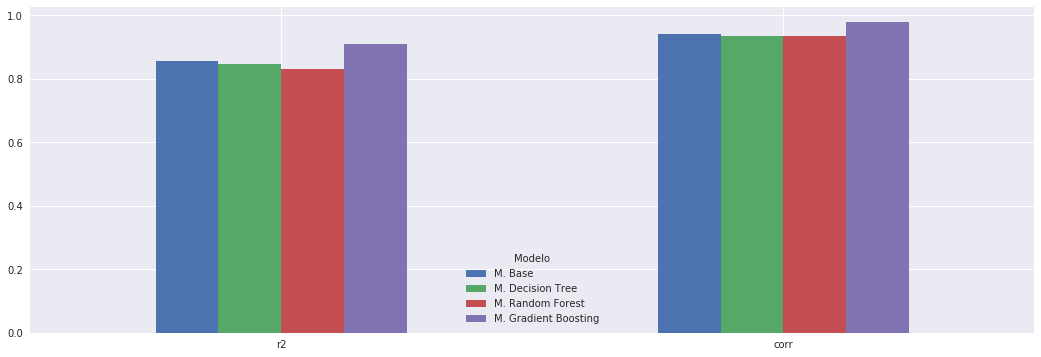

In [316]:
comparacion_metricas[['rmse', 'BIAS']].T.plot(kind = 'bar', rot = 0)
comparacion_metricas[['r2', 'corr']].T.plot(kind = 'bar', rot = 0);

## 5 - Guardar el modelo elegido:
Tal y como se ha visto mas arriba, el modelo elgido es Gradient Boosting, por lo tanto a continuación voy a guardar el modelo y también generar intervalos de confianza para las predicciones:

In [362]:
lower_model = GradientBoostingRegressor(loss="quantile", alpha=0.05)

In [363]:
lower_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.05, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [371]:
inf = pd.DataFrame()
inf['prediccion'] = lower_model.predict(x_test)
inf.index = y_test.index

In [365]:
upper_model = GradientBoostingRegressor(loss="quantile", alpha=0.95)

In [366]:
upper_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='quantile', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [370]:
sup = pd.DataFrame()
sup['prediccion'] = upper_model.predict(x_test)
sup.index = y_test.index

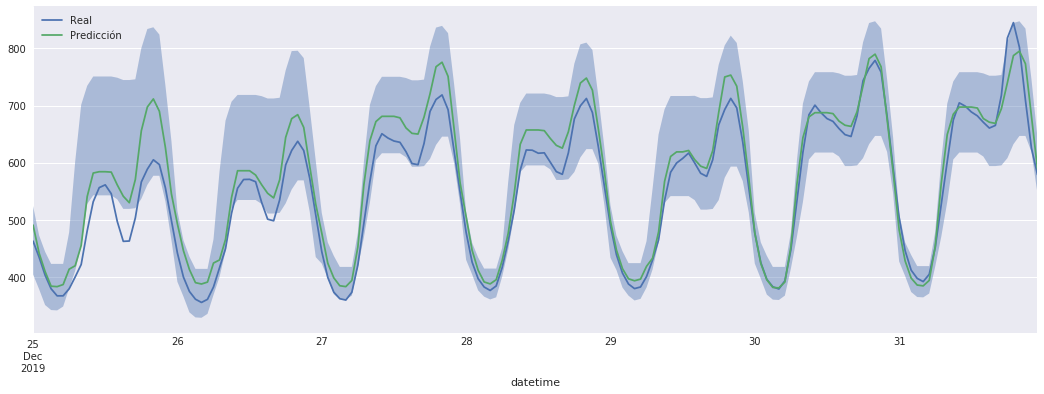

In [369]:
fig10, ax = plt.subplots()
y_test.plot(ax = ax, label = 'Real')
prediccion_m_gradientB['prediccion'].plot(ax = ax, label = 'Predicción')
ax.fill_between(inf.index, inf['prediccion'], sup['prediccion'], alpha = 0.4)
plt.legend()
plt.show()

In [373]:
pred_int_conf = pd.DataFrame()
pred_int_conf['lim_inferior'] = inf['prediccion']
pred_int_conf['Predicciones'] = prediccion_m_gradientB['prediccion']
pred_int_conf['lim_superior'] = sup['prediccion']
pred_int_conf.head()

lim_inferior  Predicciones  lim_superior
datetime                                                  
2019-12-25 00:00    404.359252    490.737629    524.157481
2019-12-25 01:00    378.705431    441.883235    472.749852
2019-12-25 02:00    350.886016    409.462773    444.102310
2019-12-25 03:00    342.101263    383.840589    422.888997
2019-12-25 04:00    341.468694    383.067031    422.888997

#### Guardo los modelos para predecir:

In [374]:
import pickle

In [375]:
pickle.dump(modelo_gradientB, open("modelo_pred.pkl","wb"))

In [376]:
pickle.dump(lower_model, open("modelo_inf.pkl","wb"))
pickle.dump(upper_model, open("modelo_sup.pkl","wb"))